In [13]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io import loadmat
import pickle
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

from keras import layers

from keras.layers import Input
from keras.layers import Dense,Conv2D,MaxPooling2D,ZeroPadding2D,AveragePooling2D,TimeDistributed,Add
from keras.layers import Activation,Flatten
from keras.models import Model

from keras.preprocessing import image
import keras.backend as K
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.engine import Layer, InputSpec
from keras import initializers, regularizers
from keras import backend as K

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.utils.vis_utils import plot_model

In [2]:
path = '../ten-datasets/germantrafficsigns/'
#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')

In [3]:
num_classes = df.shape[0]
print(df.shape)
df.head()

(43, 2)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [5]:
#load the dataset into a dataframe

training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"

with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [6]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


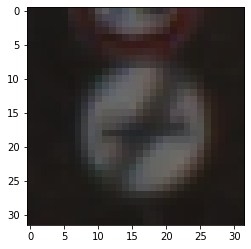

In [8]:
plt.imshow(X_train[0])

In [11]:

batch_size = 128
num_classes = 43 # 10
# epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)


X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'valid samples')
print(X_test.shape[0], 'test samples')

y_train = y_train.reshape(y_train.shape[0])
y_valid = y_valid.reshape(y_valid.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print(y_train.shape)
print(y_test.shape)

# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes) #one hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

X_train shape: (34799, 32, 32, 3)
34799 train samples
4410 valid samples
12630 test samples
(34799,)
(12630,)


(34799, 43)

In [44]:
y_train.shape

(34799, 43)

# RCNN

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

In [22]:
hist = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                 validation_data=(X_test, y_test)
                )

Train on 34799 samples, validate on 12630 samples
Epoch 1/5
34799/34799 [==============================] - 210s 6ms/step - loss: 1.4169 - accuracy: 0.5959 - val_loss: 0.3777 - val_accuracy: 0.9010
Epoch 2/5
34799/34799 [==============================] - 220s 6ms/step - loss: 0.1928 - accuracy: 0.9419 - val_loss: 0.2308 - val_accuracy: 0.9399
Epoch 3/5
34799/34799 [==============================] - 210s 6ms/step - loss: 0.0955 - accuracy: 0.9713 - val_loss: 0.1900 - val_accuracy: 0.9561
Epoch 4/5
34799/34799 [==============================] - 214s 6ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.1844 - val_accuracy: 0.9558
Epoch 5/5
34799/34799 [==============================] - 209s 6ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.1738 - val_accuracy: 0.9622


In [29]:
intermediate_layer_model = Model(inputs = model.input, outputs = model.layers[9].output)
intermediate_layer_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        3692

In [30]:
X_mid_layer_train = intermediate_layer_model.predict(X_train)
X_mid_layer_test = intermediate_layer_model.predict(X_test)
print(X_mid_layer_train.shape)
print(X_mid_layer_test.shape)

(34799, 512)
(12630, 512)


In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier


In [36]:
y_train.shape

(34799, 43)

In [46]:
model = RandomForestClassifier(criterion='gini', max_leaf_nodes=50,
                                n_estimators = 500, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
model.fit(X_mid_layer_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=True,
                       warm_start=False)

In [39]:
from sklearn.naive_bayes import GaussianNB


In [58]:
X_train_org, y_train_org = train_data['features'],train_data['labels']
X_test_org, y_test_org = test_data['features'],test_data['labels']


In [65]:
y_test_org.shape
len(y_test_predict)
# y_test_predict

43

In [57]:
svm = SVC( probability=True)
svm.fit(X_mid_layer_train,y_train_org)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
y_train_predict =svm.predict(X_mid_layer_train)
print ("Train Accuracy: %.3f" % accuracy_score(y_train_org,y_train_predict))# %%time


Train Accuracy: 1.000


In [68]:
y_test_predict = svm.predict(X_mid_layer_test)
print("Test Accuracy: %.3f" % accuracy_score(y_test_org,y_test_predict))


Test Accuracy: 0.964


In [70]:
nb=GaussianNB()
nb.fit(X_mid_layer_train,y_train_org)


GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_train_predict =nb.predict(X_mid_layer_train)
print ("Train Accuracy: %.3f" % accuracy_score(y_train_org,y_train_predict))# %%time


Train Accuracy: 0.997


In [72]:
y_test_predict = nb.predict(X_mid_layer_test)
print("Test Accuracy: %.3f" % accuracy_score(y_test_org,y_test_predict))


Test Accuracy: 0.905


# GAN